# Working with videos:

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 24 22:03:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import layers, optimizers, callbacks
from PIL import Image
import requests
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
import numpy as np
from PIL import Image
import io

In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Put Colab in the context of this challenge
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense')

In [ ]:
# making video from images:
# Define the directory containing your images
images_dir = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/test_video'

# Get the list of image filenames in the directory
image_files = sorted(os.listdir(images_dir))

# Specify the output video filename
output_video = "output_video.mp4"

# Define the video frame size (width, height) based on the size of the first image
first_image = cv2.imread(os.path.join(images_dir, image_files[0]))
frame_size = (first_image.shape[1], first_image.shape[0])

# Define the video frame rate (frames per second)
frame_rate = 1  # Adjust as needed

# Create a VideoWriter object to write the video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec (depends on the video format)
video_writer = cv2.VideoWriter(output_video, fourcc, frame_rate, frame_size)

# Iterate through each image and add it as a frame to the video
for image_file in image_files:
    image_path = os.path.join(images_dir, image_file)
    frame = cv2.imread(image_path)
    video_writer.write(frame)

# Release the VideoWriter object
video_writer.release()

print("Video created successfully:", output_video)


Video created successfully: output_video.mp4


In [ ]:
model_dummy = load_model("models/dummy_model_size100_secondtime.h5")

In [ ]:
test_data_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/test_video'
test_data_path

'/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/test_video'

1/1 [==============================] - 0s 32ms/step
['W']


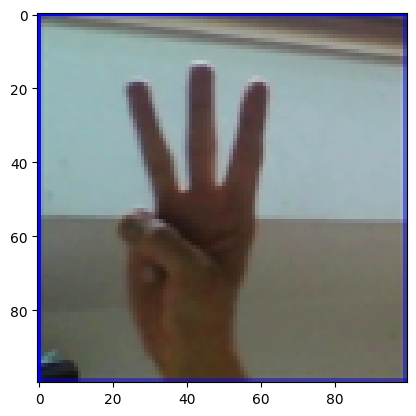

In [ ]:
test_data_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/raw_data/sign_asl/asl_alphabet_test/test_video'
files = os.listdir(test_data_path)
path = os.path.join(test_data_path, files[1])
image = Image.open(path)
image = image.resize((100, 100))
plt.imshow(image)
img = np.array(image)
img = img.reshape((-1, 100, 100, 3))
res = model_dummy.predict(img)
predicted_indc= np.argmax(res)
classes = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10, 'M':11, 'N':12, "O":13, "P":14, 'Q':15, 'R':16, 'S':17, 'T':18, 'U':19,
               "V":20, 'W':21, 'X':22, "Y":23}
predicted_letter = [letter for letter, indic in classes.items() if indic == predicted_indc]
print(predicted_letter)

In [ ]:
def predict_video(video_path, model_dummy):
    # Initialize an empty predicted word
    predicted_word = ""

    # Open the video stream
    cap = cv2.VideoCapture(video_path)

    # Read each frame from the video
    while True:
      ret, frame = cap.read()
      # If there are no more frames, break the loop
      if not ret:
          break

      # Convert the frame to PIL Image format
      frame_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

      # Resize the image to match your model input shape (assuming 50x50)
      frame_pil = frame_pil.resize((100, 100))

      # Convert the PIL Image to numpy array
      frame_np = np.array(frame_pil)

      # Reshape the numpy array to match the model input shape
      frame_np = frame_np.reshape((-1, 100, 100, 3))

      # Perform prediction using your model
      prediction = model_dummy.predict(frame_np)

      # Get the predicted index
      predicted_indc= np.argmax(prediction)



      classes = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10, 'M':11, 'N':12, "O":13, "P":14, 'Q':15, 'R':16, 'S':17, 'T':18, 'U':19,
              "V":20, 'W':21, 'X':22, "Y":23}

      # Map the predicted index to the corresponding letter
      predicted_letter = [letter for letter, indic in classes.items() if indic == predicted_indc]

      # Append the predicted letter to the predicted word
      predicted_word += predicted_letter[0]  # Assuming only one prediction per frame

    # Release the video capture object
    cap.release()

    # Return the predicted word
    return predicted_word


In [ ]:
# Replace 'path_to_video' with the actual path to your video file in Google Drive
video_path = '/content/drive/MyDrive/Colab_Notebooks/lewg_final_project/signsense/output_video.mp4'


In [ ]:

# Call the predict_video function with the video path
predicted_word = predict_video(video_path, model_dummy)
predicted_word

1/1 [==============================] - 0s 25ms/step


'OW'

In [ ]:
# Print the predicted word
print("Predicted Word:", predicted_word)

Predicted Word: OW
